<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/Python-%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E5%9F%BA%E7%A4%8E%E9%A4%8A%E6%88%90_%E5%AF%A6%E6%88%B0-%E7%A4%BE%E7%BE%A4%E5%85%B1%E5%AD%B8/Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 不重複的排列組合

Requirements：

1. 讓使用者重複輸入字串，取出字串中出現過哪些字母

2. 計算由這些字母所組成的所有排列組合存入列表

3. 每回合將列表內的字串依照字母排序後印出

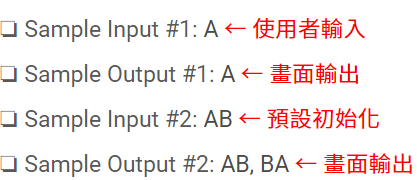

In [ ]:
def permutations(s):
  if len(s) == 1:       #只有一個字母的情況
    return s
  else:
    ans = []
    for i, j in enumerate(s):
      remain = s[:i] + s[i+1:]    # 前面 + 後面 ##不加入中間那個 ex [a,b,c] >> [a] + [c]
      #print(remain)
      for k in permutations(remain):  # 被扣掉的原本字母+剩餘的
        ans.append(j + k)       # 將組合字母
        #print(ans)
    return ans

s = input("請輸入一個字串: ")
perms = permutations(s)
print(sorted(perms))

請輸入一個字串: aBA
['ABa', 'AaB', 'BAa', 'BaA', 'aAB', 'aBA']


In [ ]:
# method2
s = input() # AB

d = []
def permute(s, i, length):
    if i == length:
        d.append("".join(s))
    else:
        for j in range(i, length):
            s[i], s[j] = s[j], s[i]
            permute(s, i+1, length)
            s[j], s[i] = s[i], s[j]

permute(list(s), 0, len(s))
print(d)

AAA
['AAA', 'AAA', 'AAA', 'AAA', 'AAA', 'AAA']


In [ ]:
# method3
# separator_string.join(sequence) ex: ['a','b','c'] > "_+_".join(list) > "a_+_b_+_c"

from itertools import permutations

s = input() # AB
d = [''.join(i) for i in permutations(s)]

print(d)

abc
['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


# Climbing Stairs

Requirements：

1. 讓使用者輸入一個數字 n ，代表需要爬到的階層數量

2. 每次可以往上移動一階或兩階，計算爬到 n 階有幾種可能的走法

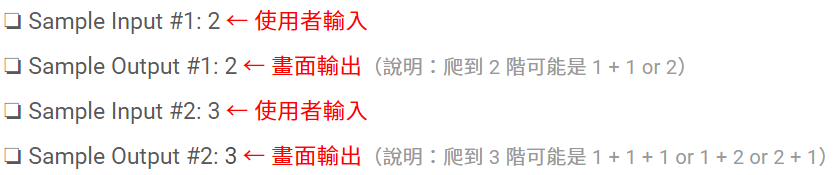

In [ ]:
# method1
# 爬到n階樓梯的方法數量等於爬上n−1階樓梯的方法數量加上爬上n−2階樓梯的方法數量
# 爬到4階 = 爬到3階(再移動1 step) + 爬到2階(再移動2 step)

def ClimbingStairs(n):
  if n == 0: return 0
  elif n == 1: return 1
  elif n == 2: return 2
  else:
    return ClimbingStairs(n-1) + ClimbingStairs(n-2)


n = eval(input("please input a integer: "))
print(f'爬到第{n}階的方法有{ClimbingStairs(n)}種')

please input a integer: 5
爬到第5階的方法有8種


In [ ]:
# method2
# 使用動態規劃。從底向上迭代地計算每個步驟的答案，而不是使用遞迴算法。這樣可以避免遞迴帶來的額外開銷。
# 所以我們想到的是將結果存在一個變數當中（而非每次都計算），將遞迴的過程暫存到一個變數中，如下：
def climbStairs(n:int):
  if n == 0: return 0
  elif n == 1: return 1
  else:
    dp = [0] * (n+1)
    dp[1] = 1
    dp[2] = 2
    for i in range(3, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

#n = int(input("please input a integer: "))
n = 1000
#print(f'爬到第{n}階的方法有{climbStairs(n)}種')
%timeit -n 10000 -r 5 climbStairs(n)

228 µs ± 45.3 µs per loop (mean ± std. dev. of 5 runs, 10000 loops each)


In [ ]:
# method3
def climbStairs(n:int):
  W = [0, 1, 2]
  for i in range(3, n+1):
    W.append(W[i - 2] + W[i - 1])
  return W[n]
#n = int(input("please input a integer: "))
n = 1000
#print(f'爬到第{n}階的方法有{climbStairs(n)}種')
%timeit -n 10000 -r 5 climbStairs(n)

278 µs ± 103 µs per loop (mean ± std. dev. of 5 runs, 10000 loops each)
